<a href="https://colab.research.google.com/github/LnAStef/Predictions-Covid19/blob/master/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Предикција на бројот на ново-заразени од Covid-19 во Македонија

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 1.Извлекување на податоците од веб страната за соопштенија на Владата и креирање на .csv фајл каде ќе се запишат истите




Земајки во предвид дека бројките се значително поразлични односно поголеми на почетокот на пандемијата, пред да се воведе вонредната состојба и карантинот, за овој модел ги извлеков само податоците од последниот месец со цел да добијам пореални бројки. 

In [58]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import csv

f = csv.writer(open('drive/My Drive/mk-covid19.csv', 'w'))
f.writerow(['Датум', 'Ново-заразени', 'Оздравени', 'Починати', 'Вкупно заразени'])

for i in range(0,13):                 
  # Селектирање на веб страниците каде има дневни соопштенија за Ковид од последните 30 дена
  if( i == 0):
    master_page = requests.get('https://vlada.mk/soopstenija')
    # print('https://vlada.mk/soopstenija')
  else: 
    master_page = requests.get('https://vlada.mk/soopstenija?page=' + str(i))
    # print('https://vlada.mk/soopstenija?page=' + str(i))
  
  
  # Create a BeautifulSoup object
  soup = BeautifulSoup(master_page.text, 'html.parser')

  # Pull all text from the BodyText div
  soopshtenija_list = soup.find_all(class_='views-special')

  for soopshtenie in soopshtenija_list:
    s = str(soopshtenie.contents[5])  # наслов на соопштението
    if(s.find("Денеска се потврдени")!=-1 or s.find("Денеска се оздравени ")!=-1 or s.find("Оздравени се ")!=-1 or s.find("оздравени се")!=-1 or s.find("Денеска потврдени")!=-1 or s.find("Потврдени")!=-1):
      
      datum = ""
      d = str(soopshtenie.contents[3])  # информација за датумот
                                      # 1-link, 3-date, 5-naslov na soop.
      print("\n")
      # print(s)
      # Средување на приказот на датумот
      for i in range(0, len(d)):
        if d[i].isnumeric():
          for j in range (i, len(d)):
            if d[j]!=",":
                continue
            else: 
                break
          datum = d[i:j]
          break
      print(datum)

      dij_previous = dij
      novi_previous = novi

      novi = 0;
      ozdraveni = 0;
      pochinati = 0;
      dij=0;

      # Извлекување на потребните информации од соопштението
      i = 0;
      new_s = s.split(" ")
      for word in new_s:
        # print(word)
        if word.isnumeric():
          # print(word)
          # print(new_s[i+1])
          if new_s[i+1] == "нови" or new_s[i+1] == "нов" or new_s[i-1] == "нови" or new_s[i-1] == "нов" :
            print("Нови:" + str(word))
            novi = int(word)
            
          if new_s[i-1] == "почина" or new_s[i-1] == "починаа" or new_s[i-1] == "починати" or (new_s[i-1] == "се" and new_s[i-2] == "починати") or (new_s[i-1] == "е" and new_s[i-2] == "починато"):
            print("Починати:" + str(word))
            pochinati = int(word)
            
          if new_s[i-2][-9:] == "Оздравени" or new_s[i-2] == "оздравени" or new_s[i-1] == "оздравени" or new_s[i-2] == "оздравен" or new_s[i+1][:9] == "оздравени" :
            print("Оздравени:" + str(word))
            ozdraveni = int(word)
            
        if word.isnumeric():

          if new_s[i+1] == "дијагностицирани" or new_s[i-1] == "дијагностицирани" or new_s[i-2] == "случаи" or new_s[i-2] == "дијагностицирани":
            print("Вкупно дијагностицирани:" + str(word))
            dij = int(word)
            i += 1
            continue;
        if word[0:len(word)-1].isnumeric():

          if new_s[i-1] == "дијагностицирани" or new_s[i-3] == "дијагностицирани" or new_s[i-2] == "дијагностицирани":
            print("Вкупно дијагностицирани:" + str(word[0:len(word)-1]))
            dij = int(word[0:len(word)-1])
            i += 1
            continue;
        if (word[0:1]+ word[2:len(word)-1]).isnumeric():

          if new_s[i-1] == "дијагностицирани":
            print("Вкупно дијагностицирани:" + str(word[0:1]+ word[2:len(word)-1]))
            dij = int(word[0:1]+ word[2:len(word)-1])
            i += 1
            continue;
        if (word[0:1]+ word[2:len(word)]).isnumeric():

          if new_s[i-2] == "дијагностицирани":
            print("Вкупно дијагностицирани:" + str(word[0:1]+ word[2:len(word)]))
            dij = int(word[0:1]+ word[2:len(word)])
            i += 1
            continue;
        if (word[0:len(word)-10]).isnumeric():

          if new_s[i-1] == "дијагностицирани":
            print("Вкупно дијагностицирани:" + str(word[0:len(word)-10]))
            dij = int(word[0:len(word)-10])
 
        i += 1

      # Пополнување вредности што недостасуваат
      if datum == "07 Мај 2020":
        ozdraveni=22
        print("Оздравени:" + str(ozdraveni))

      if dij == 0:
        dij = dij_previous - novi_previous
        print("Вкупно дијагностицирани:" + str(dij))

      f.writerow([datum, novi, ozdraveni, pochinati,dij])

      if datum == "11 Мај 2020":
        #dodadi 10ti
        novi1=20
        pochinati=0
        ozdraveni =24
        dij = dij - novi 
        datum = "10 Мај 2020"
        # print(novi1,pochinati,ozdraveni,dij)
        f.writerow([datum, novi, ozdraveni, pochinati,dij])
      if datum == "23 Април 2020":
        #dodadi 22ri
        novi1=28
        pochinati=1
        ozdraveni =48
        dij = dij - novi 
        datum = "22 Април 2020"
        # print(novi1,pochinati,ozdraveni,dij)
        f.writerow([datum, novi, ozdraveni, pochinati,dij])

      






13 Мај 2020
Нови:20
Вкупно дијагностицирани:1694
Оздравени:24
Починати:3


12 Мај 2020
Нови:10
Вкупно дијагностицирани:1674
Оздравени:5
Починати:1


11 Мај 2020
Оздравени:64
Нови:22
Вкупно дијагностицирани:1664


09 Мај 2020
Нови:36
Вкупно дијагностицирани:1622
Оздравени:13
Починати:1


08 Мај 2020
Нови:14
Оздравени:20
Вкупно дијагностицирани:1586
Починати:1


07 Мај 2020
Нови:33
Вкупно дијагностицирани:1572
Оздравени:22


06 Мај 2020
Нови:13
Оздравени:44
Починати:2
Вкупно дијагностицирани:1539


05 Мај 2020
Нови:8
Оздравени:21
Починати:1
Вкупно дијагностицирани:1526


04 Мај 2020
Нови:7
Оздравени:47
Починати:1
Вкупно дијагностицирани:1518


03 Мај 2020
Нови:5
Оздравени:95
Починати:2
Вкупно дијагностицирани:1511


02 Мај 2020
Оздравени:45
Нови:15
Вкупно дијагностицирани:1506
Починати:1


01 Мај 2020
Оздравени:69
Нови:29
Вкупно дијагностицирани:1494
Починати:4


30 Април 2020
Оздравени:111
Нови:23
Вкупно дијагностицирани:1465
Починати:4


29 Април 2020
Оздравени:38
Нови:21
Вкупно дија

## 2. Вчитување на .csv фајалот со податоците




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("drive/My Drive/mk-covid19.csv")
print(data)


            Датум  Ново-заразени  Оздравени  Починати  Вкупно заразени
0     13 Мај 2020             20         24         3             1694
1     12 Мај 2020             10          5         1             1674
2     11 Мај 2020             22         64         0             1664
3     10 Мај 2020             22         24         0             1642
4     09 Мај 2020             36         13         1             1622
5     08 Мај 2020             14         20         1             1586
6     07 Мај 2020             33         22         0             1572
7     06 Мај 2020             13         44         2             1539
8     05 Мај 2020              8         21         1             1526
9     04 Мај 2020              7         47         1             1518
10    03 Мај 2020              5         95         2             1511
11    02 Мај 2020             15         45         1             1506
12    01 Мај 2020             29         69         4             1494
13  30

## 3.1 Визуелизација на податоците по денови, за ново-заразени, починати и оздравени




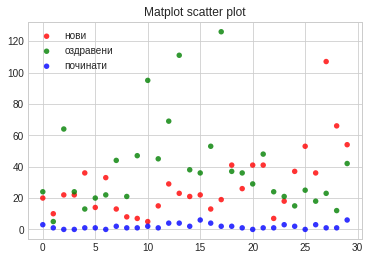

In [75]:
import numpy as np
import matplotlib.pyplot as plt

numbers = np.arange(0,data.shape[0],1)

X = ((numbers, data[['Ново-заразени']]), (numbers, data[['Оздравени']]), (numbers, data[['Починати']]))
colors = ("red", "green", "blue")
groups = ("нови", "оздравени", "починати")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for X, color, group in zip(X, colors, groups):
  x, y = X
  ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()

## 3.2 Матрица на корелација

Може да се забележи поголема корелација од околу 0.75 помеѓу атрибутите Датум и Вкупно заразени односно како што поминуваат деновите се зголемува вкупниот број на луѓе кои биле или се заразени од вирусот што е нормално. 
Сепак може да се заклучи и од природата на атрибутите имаме меѓусебно независни атрибути. 

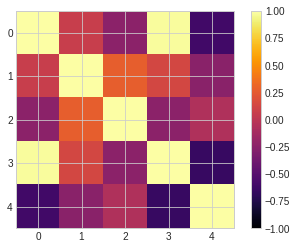

In [32]:
from scipy import stats #Library for statistical analysis
import sys 

data1 = np.loadtxt(open("drive/My Drive/mk-covid19.csv", "rb"), delimiter=",", skiprows=1,  dtype = str) #We get the remaining rows as the data

data1[:,0] = np.arange(30,0,-1)
X = data1[:,:].astype(np.int32) 

y = data1[:,1].astype(np.int32) 

X = np.delete(X, 1, axis=1)

N = X.shape[0]
number_of_features = X.shape[1]

correlation_matrix = np.ones((number_of_features +1 ,number_of_features +1))
for i in range(number_of_features): 
    measure = X[:,i]
    for j in range(number_of_features):
        measure2 = X[:,j]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr

for i in range(number_of_features): 
    measure = X[:,i]
    j = number_of_features
    measure2 = y
    corr, _ = stats.pearsonr(measure, measure2)
    correlation_matrix[i][j] = corr
    correlation_matrix[j][i] = corr

plt.figure()
plt.imshow(correlation_matrix, cmap = "inferno", vmin=-1, vmax=1) 
plt.colorbar()
plt.show()

Од следната визуелизација може да се заклучи дека како што минуваат деновите се намалуваат границите во кои се движат вредностите на ново-заразени, така што моментално се стигнати во границата околу 10-30 на ден.

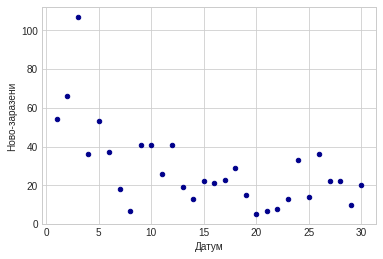

In [34]:
ax1 = data.plot.scatter(x='Датум',
                      y='Ново-заразени',
                      c='DarkBlue')

## 4. Модел на Линеарна регресија




Со овој модел тешко се постигнува R2 score да постигне висока вредност како што се бара, односно не се опишува баш успешно варијансата на податоците со овој линеарен модел. Предвидувањето е 5 нови случаеви, наспроти вистинската бројка 29.

In [84]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split


col = data.get("Датум")
d = np.arange(data.shape[0],0,-1) 
  
ser = pd.Series(d) 
data = data.replace(to_replace = list(col), value=list(d))

train , test = train_test_split(data, test_size = 0.3)


X_train = train[['Датум']]
y_train = train[['Ново-заразени']]
X_test = test[['Датум']]
y_test = test[['Ново-заразени']]


# Linear Regression
linear_regr = linear_model.LinearRegression()
# Train the model using the training sets
linear_regr.fit(X_train, y_train)
print("R2 score:")
print(linear_regr.score(X_train,y_train))

from sklearn.metrics import max_error
import math

y_pred = linear_regr.predict(X_test)
error = max_error(y_test, y_pred)


print(y_test)
print(y_pred)
print("Maximum residual error:")
print(error)

print("\nПредвидени нови случаеви за ден 14.05.2020: ")
print(int(linear_regr.predict(np.array([data.shape[0] + 1]).reshape(1,-1))))

R2 score:
0.48935194461200654
    Ново-заразени
20             41
22              7
15             22
11             15
26             36
23             18
29             54
19             26
10              5
[[44.10000596]
 [47.73875752]
 [35.00312705]
 [27.72562392]
 [55.01626065]
 [49.5581333 ]
 [60.47438799]
 [42.28063017]
 [25.90624814]]
Maximum residual error:
40.73875751980464

Предвидени нови случаеви за ден 14.05.2020: 
5


## 5. Модел на KNN регресија





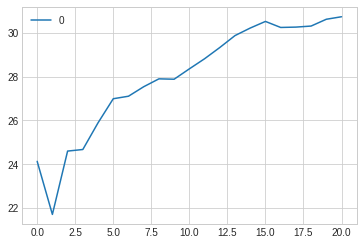

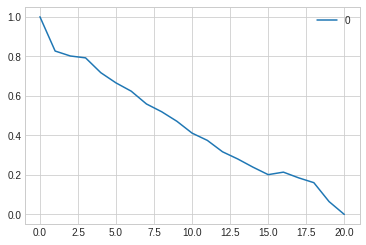

In [85]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split

col = data.get("Датум")
d = np.arange(data.shape[0],0,-1) 
  
ser = pd.Series(d) 
data = data.replace(to_replace = list(col), value=list(d))

train , test = train_test_split(data, test_size = 0.3)

X_train = train[['Датум']]
y_train = train[['Ново-заразени']]
X_test = test[['Датум']]
y_test = test[['Ново-заразени']]


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)



rmse_val = [] #to store rmse values for different k
r2_val = []
p = []
yts = []
for K in range(21):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred1=model.predict(X_test) #make prediction on test set

    p.append(pred1)   # values necessary for plotting
    yts.append(y_test)

    error = sqrt(mean_squared_error(y_test,pred1)) #calculate rmse
    rmse_val.append(error) #store rmse values
    r2_val.append(model.score(X_train,y_train)) #calculate and store R2 score value

curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

curve1 = pd.DataFrame(r2_val) #elbow curve 
curve1.plot()


In [86]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 4}

Според добиените графици и резултатот од горната функција за предвидување на оптималниот број за k-соседи, заклучокот е дека најсоодветен модел за овие податоци би бил за k=4.

Долу-наведениот график ги прикажува предвидувањата (црна боја) наспроти вистинските вредности (сина боја) за бројката на ново-заразени според податоците од тест множеството, предвидено според моделот на KNN регресија.

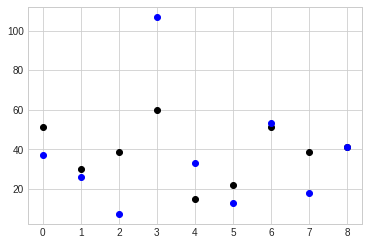

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
num = np.arange(0,9,1)

x = np.array(num)
y = np.array(p[1])


plt.plot(x, y, 'o', color='black')

x = np.array(num)
y = np.array(yts[1])


plt.plot(x, y, 'o', color='blue');

In [94]:
import numpy as np
model = neighbors.KNeighborsRegressor(n_neighbors = 4)

test = np.array([data.shape[0] + 1]).reshape(1,-1)   #make a prediction for a next day
model.fit(X_train, y_train)  #fit the model

print("Предвидени нови случаеви за ден 14.05.2020: ")
prediction=model.predict(test) #make prediction on test set
print(int(prediction))



Предвидени нови случаеви за ден 14.05.2020: 
18


Овој модел предвидува 18 нови случаеви наспроти вистинските 29. Сепак има помала грешка при предвидувањето и опишувањето на варијансата на податоците, бидејќи не е со претходен bias да треба да моделира линеарна зависност. 

## 6. Заклучок

Предвидувањето на бројот на ново-заразени врз основа на бројките од претходните денови се извршува со модел на регресија. Во овој случај, моделот за KNN регресија би бил посоодветен за овој проблем отколку моделот на обична линеарна регресија. Како и да е во секој случај, досега имаме податоци за само 2 месеци севкупно што сепак се малку за градење на високо-прецизен модел.